# 🎯 HR Analytics Dashboard - Panoramica Generale

Dashboard principale per l'analisi HR con collegamenti ai moduli specializzati.

**Data creazione**: 18/07/2025  
**Ultimo aggiornamento**: 23/07/2025

## 🔧 Nuove Funzionalità

### ✅ Verifica Automatica delle Dipendenze
Il dashboard ora include un sistema automatico di verifica e installazione delle estensioni Python necessarie:

- **Verifica automatica**: Controlla se tutti i pacchetti necessari sono installati
- **Installazione automatica**: Installa automaticamente i pacchetti mancanti
- **Gestione errori**: Gestisce gracefully i pacchetti che non possono essere installati
- **Importazioni condizionali**: Abilita funzionalità avanzate solo se i pacchetti sono disponibili

### 📦 Pacchetti Supportati
- **Core**: pandas, numpy, matplotlib, seaborn
- **Grafici interattivi**: plotly (opzionale)
- **Analisi statistiche**: scipy (opzionale)
- **Machine Learning**: scikit-learn (opzionale)
- **File Excel**: openpyxl, xlsxwriter
- **Jupyter**: ipywidgets per widget interattivi

---

In [1]:
# 🔧 VERIFICA E INSTALLAZIONE AUTOMATICA DELLE ESTENSIONI
import subprocess
import sys
import importlib

def verifica_e_installa_pacchetto(nome_pacchetto, nome_import=None):
    """
    Verifica se un pacchetto è installato e lo installa se mancante.
    
    Args:
        nome_pacchetto (str): Nome del pacchetto da installare con pip
        nome_import (str): Nome del modulo da importare (se diverso dal nome del pacchetto)
    """
    if nome_import is None:
        nome_import = nome_pacchetto
    
    try:
        importlib.import_module(nome_import)
        print(f"✅ {nome_pacchetto} già installato")
        return True
    except ImportError:
        print(f"⚠️  {nome_pacchetto} non trovato. Installazione in corso...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", nome_pacchetto])
            print(f"✅ {nome_pacchetto} installato con successo!")
            return True
        except subprocess.CalledProcessError as e:
            print(f"❌ Errore nell'installazione di {nome_pacchetto}: {e}")
            return False

# Lista dei pacchetti necessari per l'HR Dashboard
pacchetti_necessari = [
    ('pandas', 'pandas'),
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib'),
    ('seaborn', 'seaborn'),
    ('plotly', 'plotly'),
    ('scipy', 'scipy'),
    ('scikit-learn', 'sklearn'),
    ('openpyxl', 'openpyxl'),  # Per leggere file Excel
    ('xlsxwriter', 'xlsxwriter'),  # Per scrivere file Excel
    ('jupyter', 'jupyter'),
    ('ipywidgets', 'ipywidgets'),  # Per widget interattivi
]

# Verifica versione Python
def verifica_versione_python():
    """Verifica che la versione di Python sia compatibile."""
    versione_python = sys.version_info
    print(f"🐍 Python {versione_python.major}.{versione_python.minor}.{versione_python.micro}")
    
    if versione_python.major < 3:
        print("❌ ERRORE: Python 2 non è supportato. Aggiorna a Python 3.7+")
        return False
    elif versione_python.minor < 7:
        print("⚠️  ATTENZIONE: Python 3.7+ è raccomandato per la migliore compatibilità")
    else:
        print("✅ Versione Python compatibile")
    
    return True

print("🔍 Verifica dell'ambiente Python...")
print("=" * 50)

# Verifica versione Python
if not verifica_versione_python():
    print("❌ Impossibile continuare con questa versione di Python")
else:
    print("\n🔍 Verifica delle dipendenze necessarie...")
    
    pacchetti_mancanti = []
    for nome_pacchetto, nome_import in pacchetti_necessari:
        if not verifica_e_installa_pacchetto(nome_pacchetto, nome_import):
            pacchetti_mancanti.append(nome_pacchetto)
    
    print("\n" + "=" * 50)
    if not pacchetti_mancanti:
        print("🎉 Tutte le dipendenze sono installate correttamente!")
    else:
        print(f"⚠️  Alcuni pacchetti non sono stati installati: {', '.join(pacchetti_mancanti)}")
        print("   Prova a installarli manualmente con: pip install <nome_pacchetto>")
        print("   Oppure usa: pip install pandas numpy matplotlib seaborn plotly scipy scikit-learn openpyxl xlsxwriter ipywidgets")
    
    print("\n🚀 Procedendo con il setup del dashboard...")

🔍 Verifica dell'ambiente Python...
🐍 Python 3.13.1
✅ Versione Python compatibile

🔍 Verifica delle dipendenze necessarie...
✅ pandas già installato
✅ numpy già installato
✅ matplotlib già installato
✅ seaborn già installato
⚠️  plotly non trovato. Installazione in corso...
✅ plotly installato con successo!
⚠️  scipy non trovato. Installazione in corso...
✅ scipy installato con successo!
⚠️  scikit-learn non trovato. Installazione in corso...
✅ scikit-learn installato con successo!
⚠️  openpyxl non trovato. Installazione in corso...
✅ openpyxl installato con successo!
⚠️  xlsxwriter non trovato. Installazione in corso...
✅ xlsxwriter installato con successo!
✅ jupyter già installato
⚠️  ipywidgets non trovato. Installazione in corso...
✅ ipywidgets installato con successo!

🎉 Tutte le dipendenze sono installate correttamente!

🚀 Procedendo con il setup del dashboard...


In [ ]:
# 📊 SETUP INIZIALE
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Importazioni opzionali (se disponibili)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("📈 Plotly disponibile per grafici interattivi")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️  Plotly non disponibile - usando solo matplotlib/seaborn")

try:
    from scipy import stats
    SCIPY_AVAILABLE = True
    print("🔬 SciPy disponibile per analisi statistiche avanzate")
except ImportError:
    SCIPY_AVAILABLE = False
    print("⚠️  SciPy non disponibile - analisi statistiche limitate")

try:
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    SKLEARN_AVAILABLE = True
    print("🤖 Scikit-learn disponibile per machine learning")
except ImportError:
    SKLEARN_AVAILABLE = False
    print("⚠️  Scikit-learn non disponibile - funzioni ML limitate")

# Configurazione grafici
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configurazione Pandas per visualizzazione migliore
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print('\n📊 HR Analytics Dashboard - Setup completato!')
print('=' * 60)
print('📋 INFORMAZIONI AMBIENTE:')
print(f'🐍 Python {sys.version.split()[0]}')
print(f'🐼 Pandas {pd.__version__}')
print(f'📊 Matplotlib {matplotlib.__version__}')
print(f'🌊 Seaborn {sns.__version__}')

# Mostra funzionalità disponibili
print('\n🎯 FUNZIONALITÀ DISPONIBILI:')
if PLOTLY_AVAILABLE:
    print('✅ Grafici interattivi (Plotly)')
else:
    print('❌ Grafici interattivi (Plotly non disponibile)')

if SCIPY_AVAILABLE:
    print('✅ Analisi statistiche avanzate (SciPy)')
else:
    print('❌ Analisi statistiche avanzate (SciPy non disponibile)')

if SKLEARN_AVAILABLE:
    print('✅ Machine Learning (Scikit-learn)')
else:
    print('❌ Machine Learning (Scikit-learn non disponibile)')

print('\n💡 SUGGERIMENTI:')
if not PLOTLY_AVAILABLE:
    print('   • Installa Plotly per grafici interattivi: pip install plotly')
if not SCIPY_AVAILABLE:
    print('   • Installa SciPy per analisi statistiche: pip install scipy')
if not SKLEARN_AVAILABLE:
    print('   • Installa Scikit-learn per ML: pip install scikit-learn')

print('\n🚀 Dashboard pronto per l\'uso!')
print('=' * 60)

📈 Plotly disponibile per grafici interattivi


In [ ]:

# 📁 CARICAMENTO DATI HR
def carica_dati_hr():
    """Carica e prepara i dati HR per l'analisi."""
    
    try:
        # Prova prima il dataset con turnover
        df = pd.read_csv('hr_data_con_turnover.csv')
        print(f"✅ Dataset con turnover caricato: {len(df)} dipendenti")
        dataset_type = "turnover"
    except FileNotFoundError:
        try:
            # Fallback al dataset originale
            df = pd.read_csv('hr_data.csv')
            print(f"✅ Dataset originale caricato: {len(df)} dipendenti")
            dataset_type = "originale"
        except FileNotFoundError:
            print("❌ Nessun dataset trovato!")
            return None, None
    
    # Converti le date
    date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
    
    # Calcola età e anzianità
    oggi = pd.Timestamp.now()
    if 'DateOfBirth' in df.columns:
        eta_days = (oggi - df['DateOfBirth']).dt.days
        df['Eta'] = (eta_days / 365.25).round().astype('Int64')
    
    if 'HiringDate' in df.columns:
        servizio_days = (oggi - df['HiringDate']).dt.days
        df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
        df['AnnoAssunzione'] = df['HiringDate'].dt.year
    
    print(f"📊 Dati preparati per l'analisi!")
    return df, dataset_type

# Carica i dati
df, dataset_type = carica_dati_hr()


✅ Dataset con turnover caricato: 250 dipendenti
📊 Dati preparati per l'analisi!


In [ ]:

# 📊 PANORAMICA GENERALE
if df is not None:
    print("🎯 DASHBOARD HR - PANORAMICA GENERALE")
    print("=" * 60)
    
    # Statistiche base
    total_employees = len(df)
    print(f"👥 **Totale Dipendenti**: {total_employees:,}")
    
    # Analisi per status (se presente)
    if 'EmploymentStatus' in df.columns:
        status_counts = df['EmploymentStatus'].value_counts()
        print(f"\n📊 **Status Dipendenti**:")
        for status, count in status_counts.items():
            pct = count / total_employees * 100
            print(f"   • {status}: {count:,} ({pct:.1f}%)")
    
    # Analisi per genere
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        print(f"\n👥 **Distribuzione Genere**:")
        for gender, count in gender_counts.items():
            pct = count / total_employees * 100
            gender_label = "Uomini" if gender == 'M' else "Donne"
            print(f"   • {gender_label}: {count:,} ({pct:.1f}%)")
    
    # Statistiche età
    if 'Eta' in df.columns:
        eta_stats = df['Eta'].describe()
        print(f"\n🎂 **Statistiche Età**:")
        print(f"   • Media: {eta_stats['mean']:.1f} anni")
        print(f"   • Mediana: {eta_stats['50%']:.1f} anni")
        print(f"   • Range: {eta_stats['min']:.0f}-{eta_stats['max']:.0f} anni")
    
    # Statistiche stipendio
    if 'Salary' in df.columns:
        salary_stats = df['Salary'].describe()
        print(f"\n💰 **Statistiche Stipendio**:")
        print(f"   • Media: €{salary_stats['mean']:,.0f}")
        print(f"   • Mediana: €{salary_stats['50%']:,.0f}")
        print(f"   • Range: €{salary_stats['min']:,.0f}-€{salary_stats['max']:,.0f}")
    
    # Dipartimenti principali
    if 'Department' in df.columns:
        dept_counts = df['Department'].value_counts().head(5)
        print(f"\n🏢 **Top 5 Dipartimenti**:")
        for dept, count in dept_counts.items():
            pct = count / total_employees * 100
            print(f"   • {dept}: {count:,} ({pct:.1f}%)")


🎯 DASHBOARD HR - PANORAMICA GENERALE
👥 **Totale Dipendenti**: 250

📊 **Status Dipendenti**:
   • Active: 150 (60.0%)
   • Terminated: 100 (40.0%)

👥 **Distribuzione Genere**:
   • Uomini: 130 (52.0%)
   • Donne: 120 (48.0%)

🎂 **Statistiche Età**:
   • Media: 51.6 anni
   • Mediana: 52.0 anni
   • Range: 36-66 anni

💰 **Statistiche Stipendio**:
   • Media: €40,130
   • Mediana: €39,183
   • Range: €22,037-€59,172

🏢 **Top 5 Dipartimenti**:
   • Vendite: 69 (27.6%)
   • Produzione: 48 (19.2%)
   • Amministrazione: 48 (19.2%)
   • IT: 44 (17.6%)
   • HR: 21 (8.4%)



## 📋 Moduli di Analisi Specializzati

Questo dashboard fornisce una panoramica generale. Per analisi approfondite, utilizza i moduli specializzati:

### 🎯 **Moduli Disponibili:**

1. **📊 [Analisi Demografica](./01_Analisi_Demografica.ipynb)**
   - Distribuzione per età, genere, stato civile
   - Fasce generazionali e trend demografici
   - Raccomandazioni per diversity & inclusion

2. **💰 [Analisi Retributiva](./02_Analisi_Retributiva.ipynb)**
   - Distribuzione stipendi per ruolo e dipartimento
   - Gender pay gap e analisi equità
   - Correlazioni anzianità-stipendio

3. **🔄 [Analisi Turnover](./03_Analisi_Turnover.ipynb)**
   - Tassi di turnover per genere e dipartimento
   - Analisi retention e cause di uscita
   - Raccomandazioni per migliorare retention

4. **🏖️ [Proiezioni Pensionistiche](./04_Proiezioni_Pensionistiche.ipynb)**
   - Calcoli secondo leggi italiane
   - Impatto economico e knowledge at risk
   - Pianificazione successione

5. **📈 [Performance Analysis](./05_Performance_Analysis.ipynb)**
   - Distribuzione performance scores
   - Correlazioni con altri fattori
   - Identificazione talenti e aree di miglioramento

6. **📋 [Report Esecutivo](./06_Report_Esecutivo.ipynb)**
   - Sintesi KPI principali
   - Dashboard per leadership
   - Raccomandazioni strategiche

### 🚀 **Come Utilizzare:**
1. Esegui questo dashboard per la panoramica generale
2. Apri i moduli specifici per analisi dettagliate
3. Utilizza il Report Esecutivo per presentazioni alla leadership


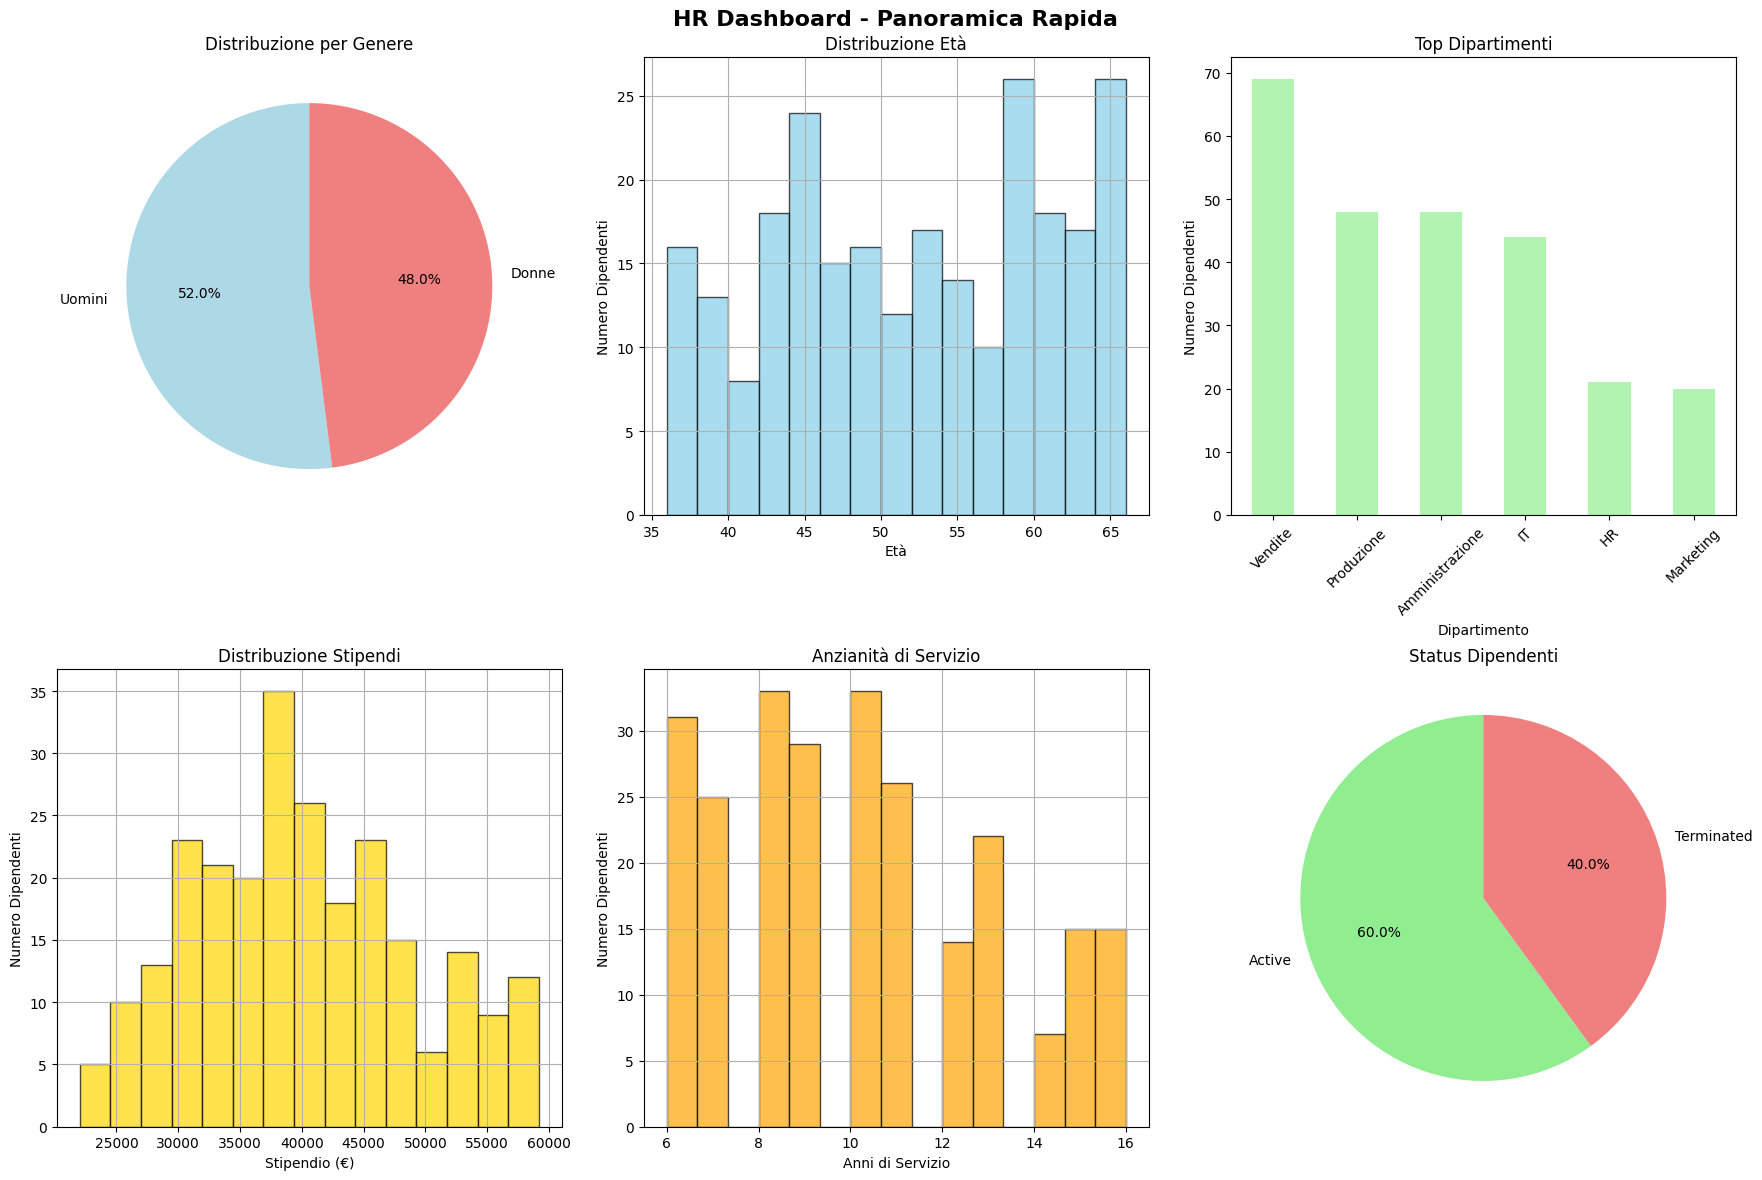


🎯 Per analisi dettagliate, utilizza i moduli specializzati!


In [ ]:

# 📊 VISUALIZZAZIONI RAPIDE
if df is not None:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('HR Dashboard - Panoramica Rapida', fontsize=16, fontweight='bold')
    
    # Grafico 1: Distribuzione per genere
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        axes[0,0].pie(gender_counts.values, labels=['Uomini' if x=='M' else 'Donne' for x in gender_counts.index], 
                     autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
        axes[0,0].set_title('Distribuzione per Genere')
    
    # Grafico 2: Distribuzione età
    if 'Eta' in df.columns:
        df['Eta'].hist(bins=15, ax=axes[0,1], alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,1].set_title('Distribuzione Età')
        axes[0,1].set_xlabel('Età')
        axes[0,1].set_ylabel('Numero Dipendenti')
    
    # Grafico 3: Top dipartimenti
    if 'Department' in df.columns:
        dept_counts = df['Department'].value_counts().head(6)
        dept_counts.plot(kind='bar', ax=axes[0,2], color='lightgreen', alpha=0.7)
        axes[0,2].set_title('Top Dipartimenti')
        axes[0,2].set_xlabel('Dipartimento')
        axes[0,2].set_ylabel('Numero Dipendenti')
        axes[0,2].tick_params(axis='x', rotation=45)
    
    # Grafico 4: Distribuzione stipendi
    if 'Salary' in df.columns:
        df['Salary'].hist(bins=15, ax=axes[1,0], alpha=0.7, color='gold', edgecolor='black')
        axes[1,0].set_title('Distribuzione Stipendi')
        axes[1,0].set_xlabel('Stipendio (€)')
        axes[1,0].set_ylabel('Numero Dipendenti')
    
    # Grafico 5: Anzianità di servizio
    if 'AnniServizio' in df.columns:
        df['AnniServizio'].hist(bins=15, ax=axes[1,1], alpha=0.7, color='orange', edgecolor='black')
        axes[1,1].set_title('Anzianità di Servizio')
        axes[1,1].set_xlabel('Anni di Servizio')
        axes[1,1].set_ylabel('Numero Dipendenti')
    
    # Grafico 6: Status dipendenti (se presente)
    if 'EmploymentStatus' in df.columns:
        status_counts = df['EmploymentStatus'].value_counts()
        axes[1,2].pie(status_counts.values, labels=status_counts.index, 
                     autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
        axes[1,2].set_title('Status Dipendenti')
    else:
        # Performance scores come alternativa
        if 'PerformanceScore' in df.columns:
            perf_counts = df['PerformanceScore'].value_counts()
            perf_counts.plot(kind='bar', ax=axes[1,2], color='purple', alpha=0.7)
            axes[1,2].set_title('Performance Scores')
            axes[1,2].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 Per analisi dettagliate, utilizza i moduli specializzati!")
